Kelompok 9 PMD

Nadia, Rafly, Fadhil

##### [**Predict Conversion in Digital Marketing Dataset**](https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset)

#### EDA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df_original = pd.read_csv('digital_marketing_campaign_dataset.csv') 
df = df_original.copy()
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [3]:
df.isna().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [165]:
print(df['AdvertisingTool'].unique())
print(df['AdvertisingPlatform'].unique())

['ToolConfid']
['IsConfid']


In [166]:
if df['CustomerID'].duplicated().any():
    print("Terdapat duplikat pada CustomerID.")
    print(df[df['CustomerID'].duplicated(keep=False)])
else:
    print("Tidak ada duplikat pada CustomerID.")

Tidak ada duplikat pada CustomerID.


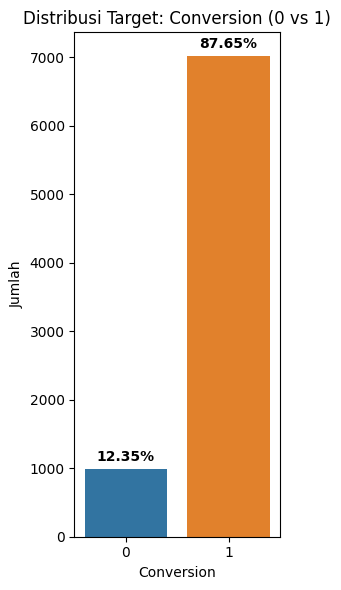

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

conversion_counts = df['Conversion'].value_counts().sort_index()
total = conversion_counts.sum()
percentages = (conversion_counts / total * 100).round(2)

colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(3, 6))
ax = sns.countplot(x='Conversion', hue='Conversion', data=df, palette=colors, legend=False)

for i, count in enumerate(conversion_counts):
    plt.text(i, count + total * 0.01, f'{percentages[i]}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Distribusi Target: Conversion (0 vs 1)")
plt.xlabel("Conversion")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

## Pre-Processing

In [4]:
df.drop(columns=['CustomerID', 'AdvertisingTool', 'AdvertisingPlatform'], inplace=True)

In [5]:
column_info = pd.DataFrame({
    'Tipe Data': df.dtypes.astype(str),
    'Kategori': ['Numerikal' if dtype in ['int64', 'float64'] else 'Kategorikal' for dtype in df.dtypes]
})

print(column_info)

                  Tipe Data     Kategori
Age                   int64    Numerikal
Gender               object  Kategorikal
Income                int64    Numerikal
CampaignChannel      object  Kategorikal
CampaignType         object  Kategorikal
AdSpend             float64    Numerikal
ClickThroughRate    float64    Numerikal
ConversionRate      float64    Numerikal
WebsiteVisits         int64    Numerikal
PagesPerVisit       float64    Numerikal
TimeOnSite          float64    Numerikal
SocialShares          int64    Numerikal
EmailOpens            int64    Numerikal
EmailClicks           int64    Numerikal
PreviousPurchases     int64    Numerikal
LoyaltyPoints         int64    Numerikal
Conversion            int64    Numerikal


In [6]:
categorical_feat = ['Gender', 'CampaignChannel', 'CampaignType']
numerical_feat = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
                  'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
                  'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']
target = 'Conversion'

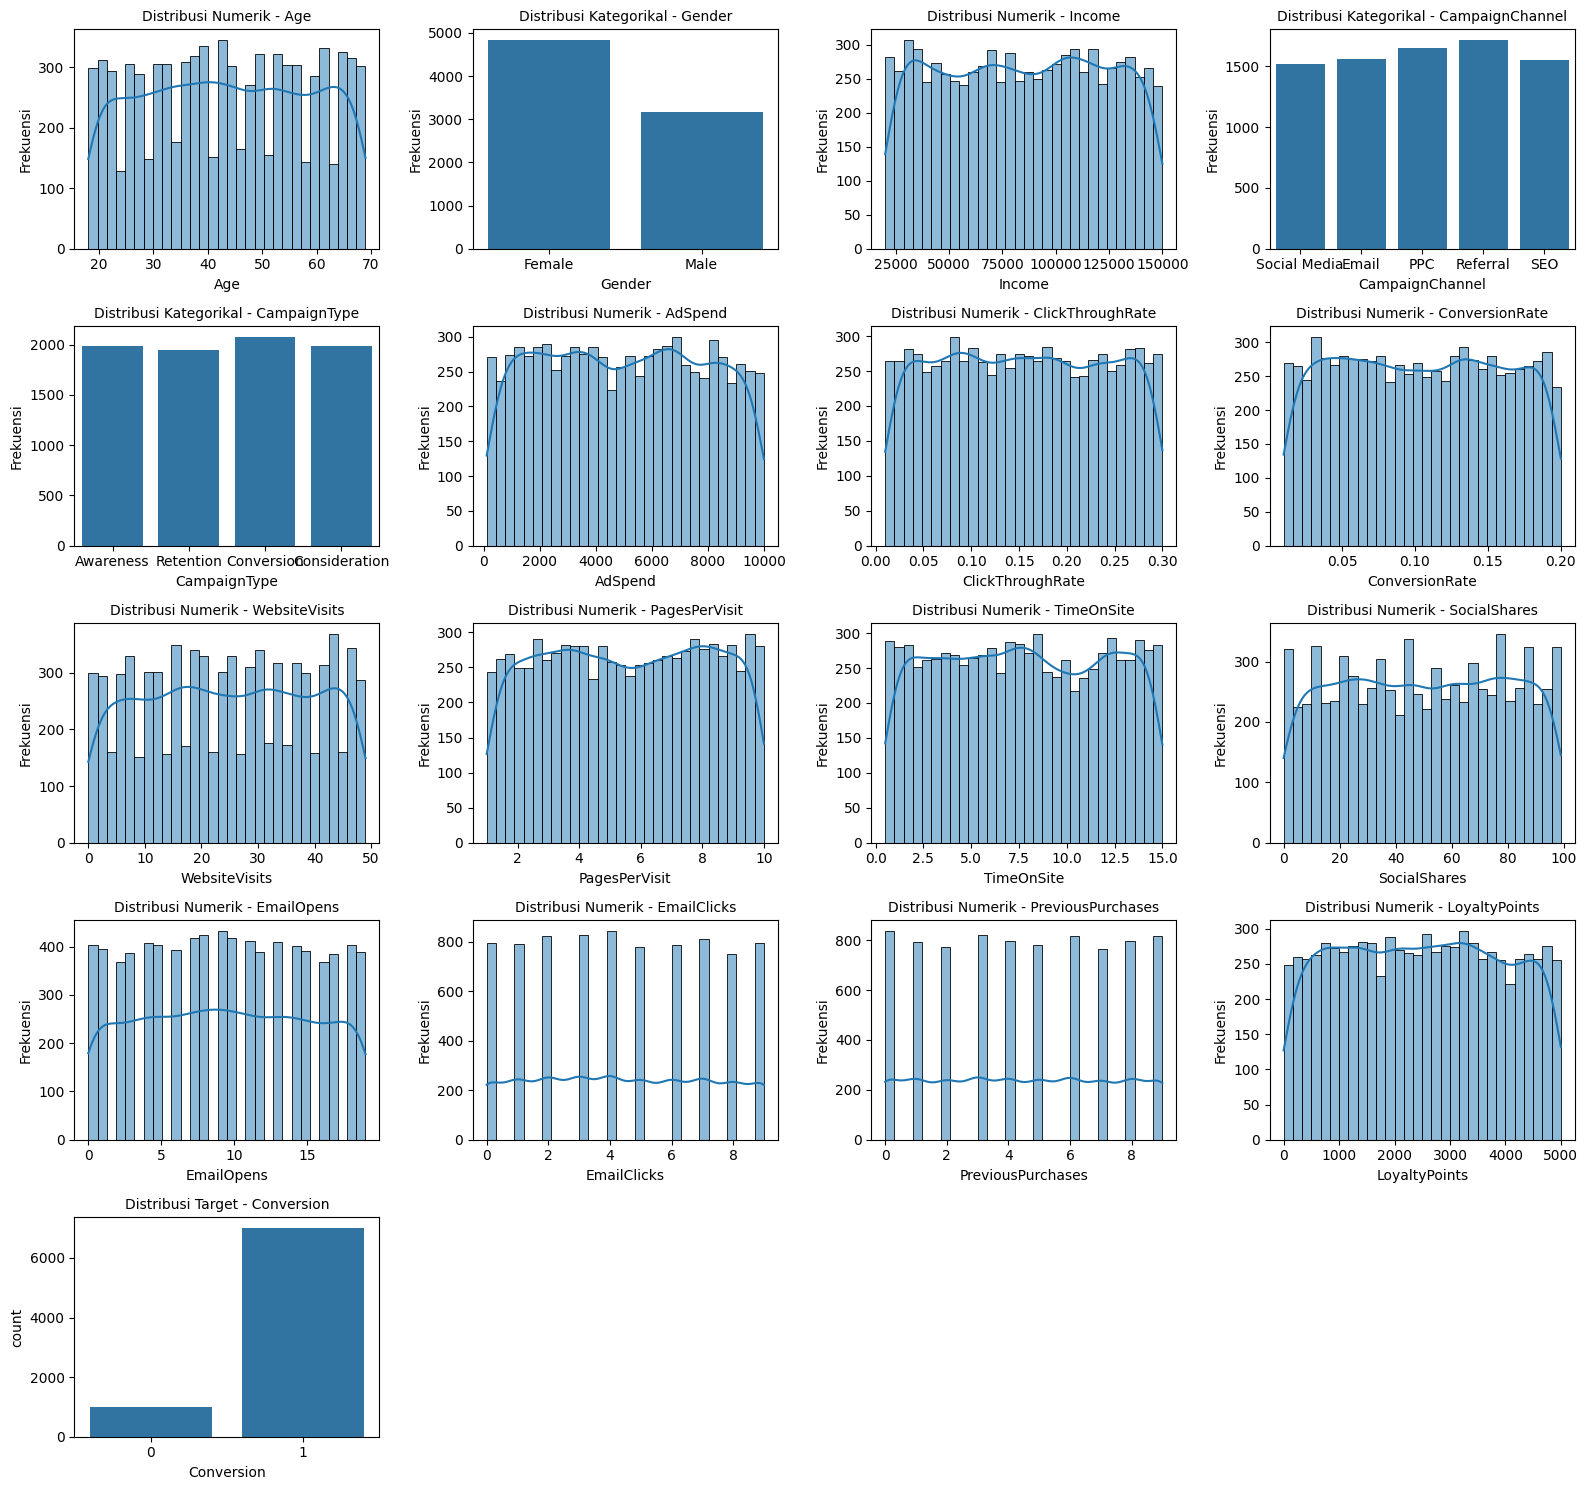

In [171]:
import math

num_cols = 4
num_rows = math.ceil(len(df.columns) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(df.columns):
    ax = axes[idx]

    if col in categorical_feat:
        sns.countplot(x=col, data=df, ax=ax)
        ax.set_title(f'Distribusi Kategorikal - {col}', fontsize=10)
        ax.set_xlabel(col)
        ax.set_ylabel('Frekuensi')
    elif col != target:
        sns.histplot(df[col], kde=True, bins=30, ax=ax)
        ax.set_title(f'Distribusi Numerik - {col}', fontsize=10)
        ax.set_xlabel(col)
        ax.set_ylabel('Frekuensi')
    else:
        sns.countplot(x=col, data=df, ax=ax)
        ax.set_title(f'Distribusi Target - {col}', fontsize=10)

for idx in range(len(df.columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

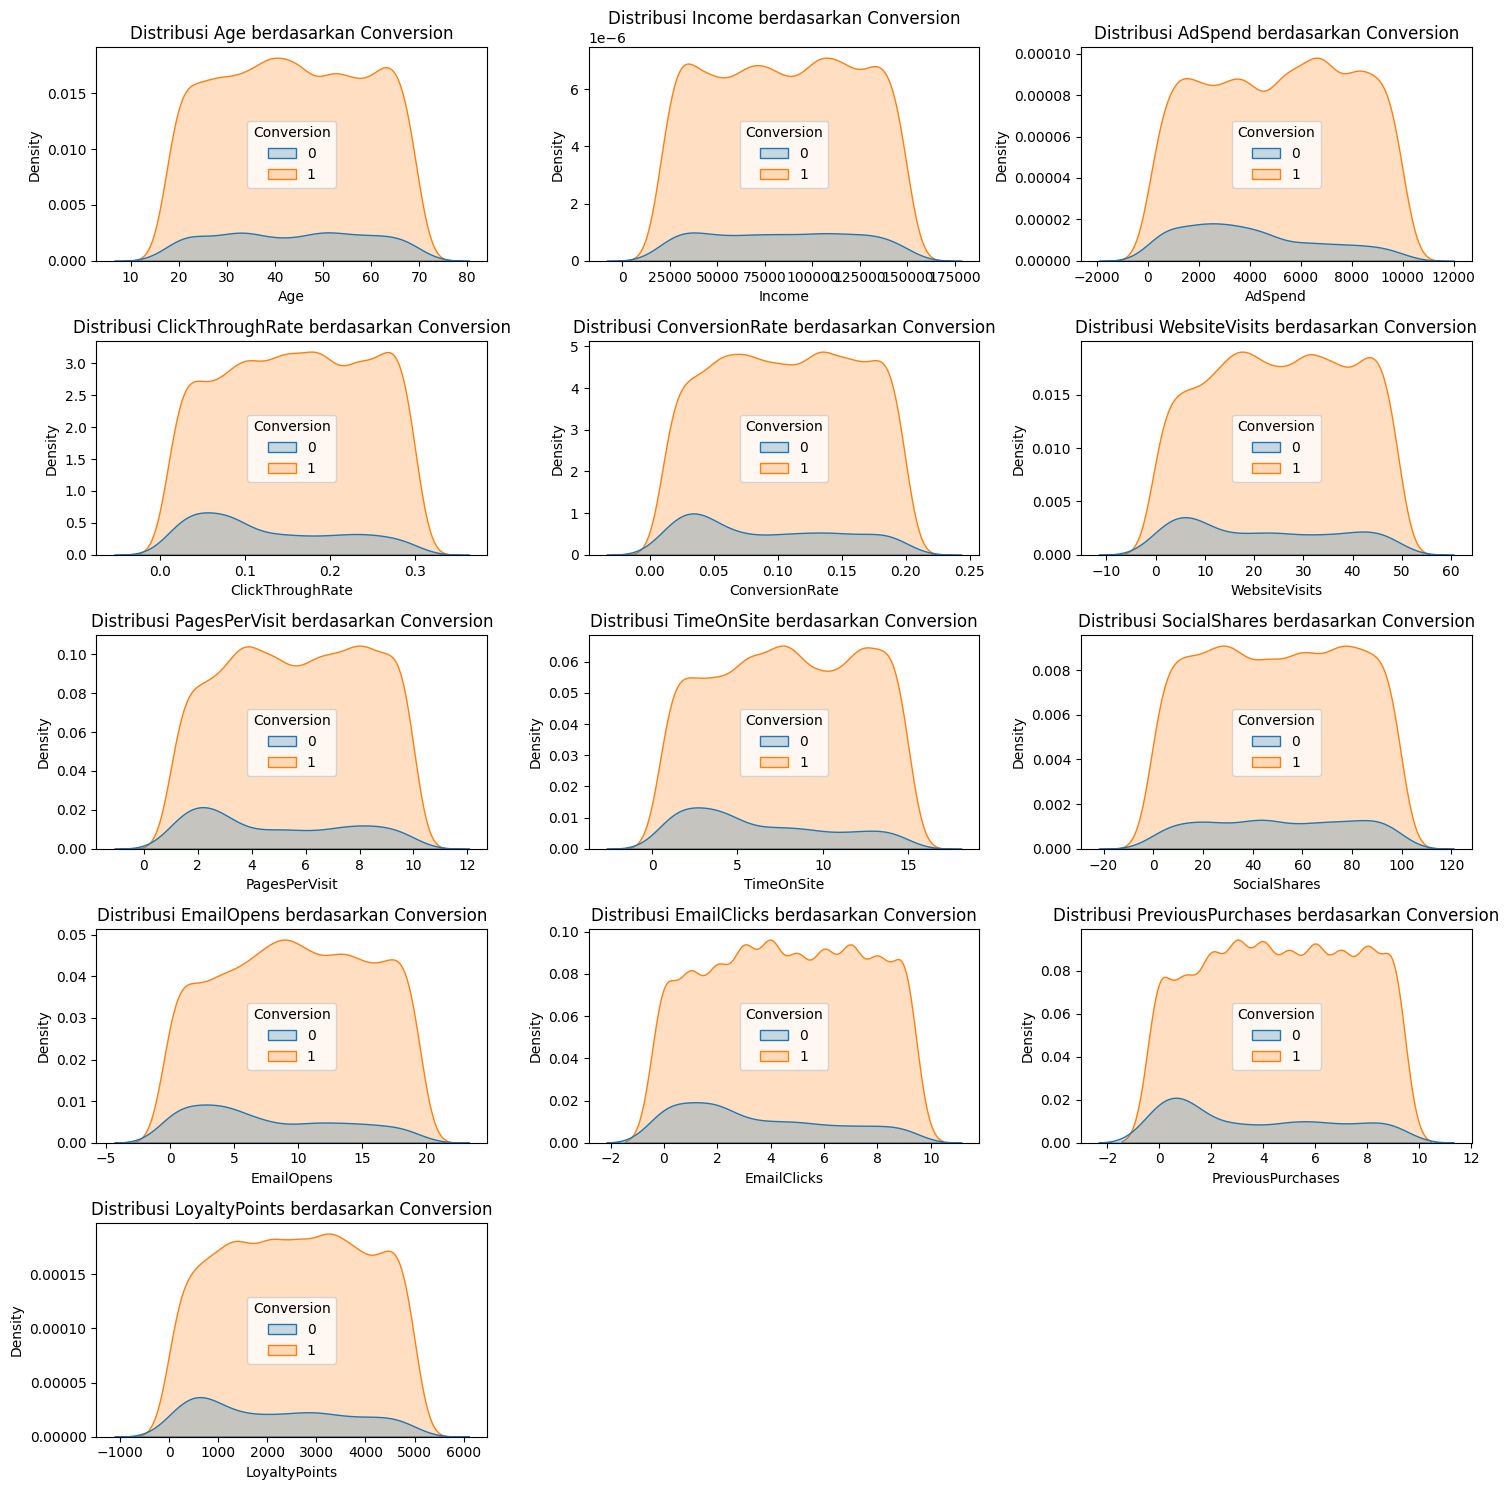

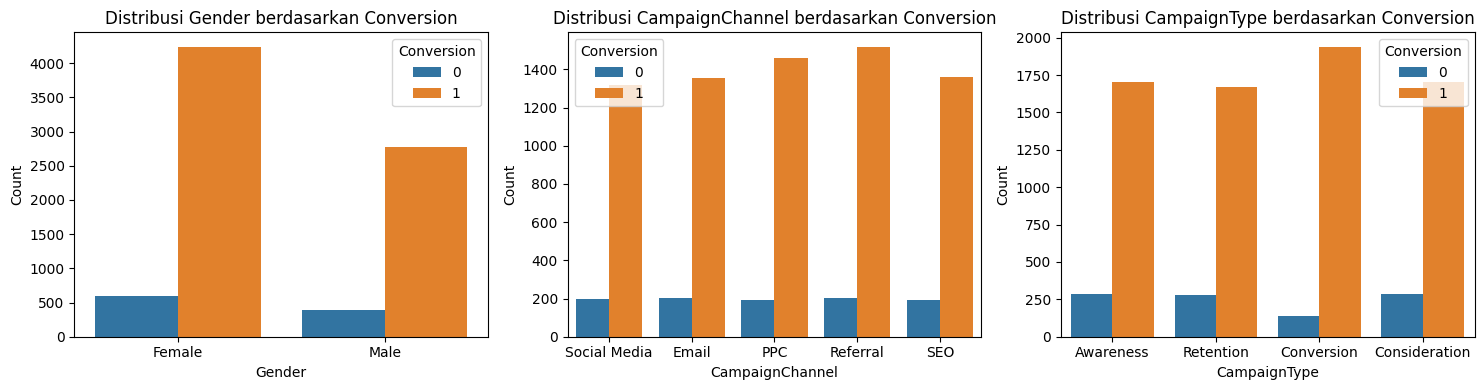

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if target in categorical_cols:
    categorical_cols.remove(target)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target in numerical_cols:
    numerical_cols.remove(target)

num_cols = 3
num_rows = math.ceil(len(numerical_cols) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.kdeplot(
        data=df,
        x=col,
        hue=target,
        fill=True,
        ax=axes[idx]
    )
    axes[idx].set_title(f'Distribusi {col} berdasarkan {target}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Density')

for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

num_cols = 3
num_rows = math.ceil(len(categorical_cols) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    sns.countplot(
        data=df,
        x=col,
        hue=target,
        ax=axes[idx]
    )
    axes[idx].set_title(f'Distribusi {col} berdasarkan {target}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

for idx in range(len(categorical_feat), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


=== Korelasi Fitur terhadap Conversion ===
SocialShares        -0.011449
Age                  0.001606
Income               0.013974
WebsiteVisits        0.079339
ConversionRate       0.093185
LoyaltyPoints        0.095004
PagesPerVisit        0.102840
PreviousPurchases    0.111781
ClickThroughRate     0.120012
AdSpend              0.124672
EmailOpens           0.124884
EmailClicks          0.129521
TimeOnSite           0.129609
dtype: float64


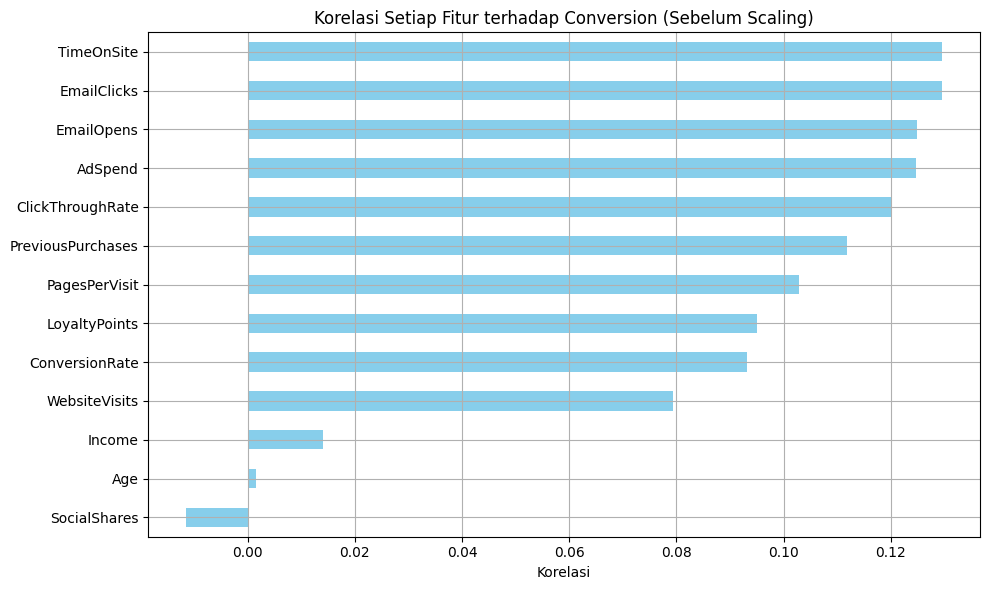

In [ ]:
import matplotlib.pyplot as plt

if 'Conversion' not in numerical_cols:
    numerical_cols.append('Conversion')

df_num = df[numerical_cols]

correlations = df_num.drop('Conversion', axis=1).corrwith(df_num['Conversion']).sort_values()

print("=== Korelasi Fitur terhadap Conversion ===")
print(correlations)

plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='skyblue')
plt.title('Korelasi Setiap Fitur terhadap Conversion (Sebelum Scaling)')
plt.xlabel('Korelasi')
plt.grid(True)
plt.tight_layout()
plt.show()

=== Korelasi Fitur Kategorikal (One-Hot) terhadap Conversion ===
CampaignType_Consideration     -0.036470
CampaignType_Awareness         -0.036470
CampaignType_Retention         -0.031471
CampaignChannel_Social Media   -0.012015
CampaignChannel_Email          -0.009318
Gender_Female                  -0.001075
CampaignChannel_SEO             0.000409
Gender_Male                     0.001075
CampaignChannel_PPC             0.009748
CampaignChannel_Referral        0.010449
CampaignType_Conversion         0.102696
Name: Conversion, dtype: float64


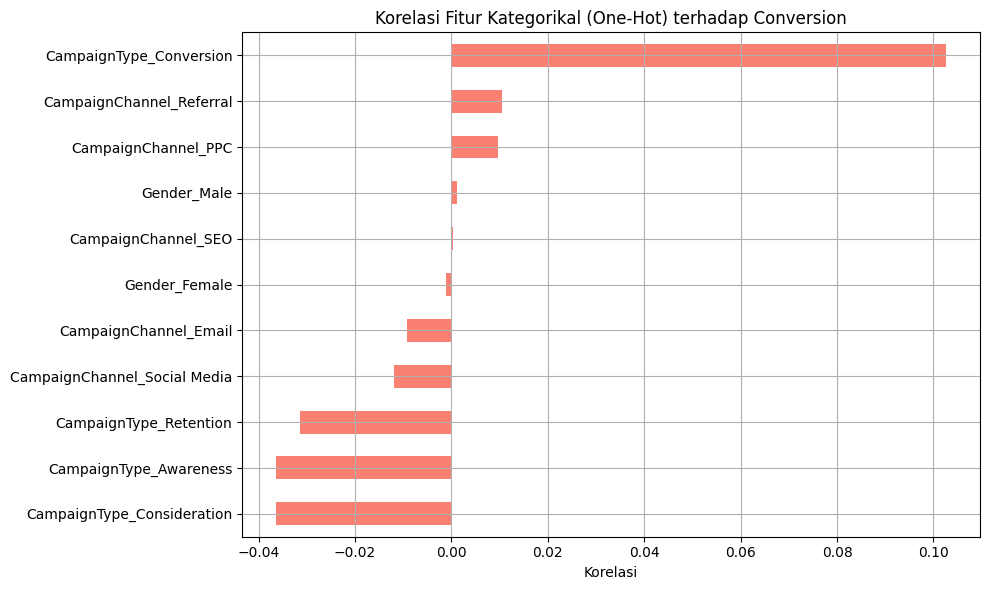

In [174]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
encoded_array = ohe.fit_transform(df[categorical_cols]).toarray()

encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(categorical_cols), index=df.index)
df_encoded = pd.concat([encoded_df, df['Conversion']], axis=1)
cat_corr = df_encoded.corr()['Conversion'].drop('Conversion').sort_values()

print("=== Korelasi Fitur Kategorikal (One-Hot) terhadap Conversion ===")
print(cat_corr)

plt.figure(figsize=(10, 6))
cat_corr.plot(kind='barh', color='salmon')
plt.title('Korelasi Fitur Kategorikal (One-Hot) terhadap Conversion')
plt.xlabel('Korelasi')
plt.grid(True)
plt.tight_layout()
plt.show()


In [175]:
def detect_outliers_iqr(df, features, threshold=0.05):
    outlier_info = {}
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_ratio = outliers / len(df)
        outlier_info[col] = outlier_ratio
    return outlier_info

X = df[numerical_feat] 

outlier_ratios = detect_outliers_iqr(X, numerical_feat)

print("🔍 Persentase Outlier (IQR):")
for col, ratio in outlier_ratios.items():
    status = "⚠️ Tinggi" if ratio > 0.05 else "✅ Aman"
    print(f"{col}: {ratio:.2%} {status}")


🔍 Persentase Outlier (IQR):
Age: 0.00% ✅ Aman
Income: 0.00% ✅ Aman
AdSpend: 0.00% ✅ Aman
ClickThroughRate: 0.00% ✅ Aman
ConversionRate: 0.00% ✅ Aman
WebsiteVisits: 0.00% ✅ Aman
PagesPerVisit: 0.00% ✅ Aman
TimeOnSite: 0.00% ✅ Aman
SocialShares: 0.00% ✅ Aman
EmailOpens: 0.00% ✅ Aman
EmailClicks: 0.00% ✅ Aman
PreviousPurchases: 0.00% ✅ Aman
LoyaltyPoints: 0.00% ✅ Aman


In [176]:
skewness = X[numerical_feat].skew()

print("🔍 Skewness setiap fitur:")
for col, val in skewness.items():
    status = ""
    if abs(val) < 0.5:
        status = "✅ Aman (skew rendah)"
    elif abs(val) < 1:
        status = "⚠️ Moderat (pertimbangkan transformasi)"
    else:
        status = "🚨 Tinggi (perlu transformasi)"
    print(f"{col}: {val:.3f} {status}")


🔍 Skewness setiap fitur:
Age: -0.005 ✅ Aman (skew rendah)
Income: -0.011 ✅ Aman (skew rendah)
AdSpend: 0.019 ✅ Aman (skew rendah)
ClickThroughRate: 0.011 ✅ Aman (skew rendah)
ConversionRate: 0.013 ✅ Aman (skew rendah)
WebsiteVisits: -0.017 ✅ Aman (skew rendah)
PagesPerVisit: -0.013 ✅ Aman (skew rendah)
TimeOnSite: 0.015 ✅ Aman (skew rendah)
SocialShares: -0.011 ✅ Aman (skew rendah)
EmailOpens: 0.008 ✅ Aman (skew rendah)
EmailClicks: 0.023 ✅ Aman (skew rendah)
PreviousPurchases: 0.006 ✅ Aman (skew rendah)
LoyaltyPoints: 0.016 ✅ Aman (skew rendah)


In [7]:
df.drop(columns=['SocialShares', 'CampaignChannel', 'Gender', 'Age'], inplace=True)

categorical_feat = ['CampaignType']
numerical_feat = ['Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
                  'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens',
                  'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']
target = 'Conversion'

## Feature Engineering

In [8]:
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

encoders = {}
for col in categorical_feat:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

X = df[categorical_feat + numerical_feat]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numerical_feat])
X_test_num_scaled = scaler.transform(X_test[numerical_feat])

X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns=numerical_feat, index=X_train.index)
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns=numerical_feat, index=X_test.index)

X_train_processed = pd.concat([X_train[categorical_feat], X_train_num_scaled_df], axis=1)
X_test_processed = pd.concat([X_test[categorical_feat], X_test_num_scaled_df], axis=1)

preprocessor = {
    'scaler': scaler,
    'encoders': encoders,
    'categorical_feat': categorical_feat,
    'numerical_feat': numerical_feat
}

joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [179]:
# X_train_scaled.to_csv('X_train_scaled.csv', index=False)
# X_test_scaled.to_csv('X_test_scaled.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

## **SVM**

#### Library

In [226]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC(class_weight='balanced', random_state=42)

svm_model.fit(X_train_processed, y_train)

y_pred_svm = svm_model.predict(X_test_processed)

print("=== SVM Classification Report ===")
print(classification_report(y_test, y_pred_svm, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

=== SVM Classification Report ===
              precision    recall  f1-score   support

           0       0.39      0.60      0.47       198
           1       0.94      0.87      0.90      1402

    accuracy                           0.83      1600
   macro avg       0.66      0.73      0.69      1600
weighted avg       0.87      0.83      0.85      1600

Confusion Matrix:
[[ 119   79]
 [ 186 1216]]


#### Manual

In [ ]:
import numpy as np
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

# Compute class weights like sklearn's balanced
def compute_class_weights(y):
    counts = Counter(y)
    total = len(y)
    class_weights = {label: total/count for label, count in counts.items()}
    return class_weights

# Train linear SVM with subgradient descent
def svm_train(X, y, class_weights, lr=0.001, epochs=1000, C=1.0):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    for epoch in range(epochs):
        for idx in range(n_samples):
            xi = X[idx]
            yi = y[idx]

            weight = class_weights[yi]
            condition = yi * (np.dot(w, xi) + b)
            if condition >= 1:
                w -= lr * 2 * w
            else:
                w -= lr * (2 * w - C * weight * yi * xi)
                b -= lr * (-C * weight * yi)
    return w, b

def svm_predict(X, w, b):
    linear_output = np.dot(X, w) + b
    return np.where(linear_output >= 0, 1, -1)

In [ ]:
X_train_np = X_train_processed.to_numpy()
X_test_np = X_test_processed.to_numpy()
y_train_bin = np.where(y_train == 0, -1, 1).astype(int)
y_test_bin = np.where(y_test == 0, -1, 1).astype(int)

class_weights = compute_class_weights(y_train_bin)

w, b = svm_train(X_train_np, y_train_bin, class_weights, lr=0.001, epochs=1000, C=1.0)
y_pred_bin = svm_predict(X_test_np, w, b)

y_pred = np.where(y_pred_bin == -1, 0, 1)

print("=== Linear SVM Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [229]:
X_test_original = df_original.loc[X_test.index, categorical_feat + numerical_feat]

print("Sampel Hasil Prediksi:")
print(y_pred)

results_df = X_test_original.copy()
results_df['True_Label'] = y_test.values
results_df['Predicted_Label'] = y_pred
results_df['Correct'] = results_df['True_Label'] == results_df['Predicted_Label']
results_df['Correct'] = results_df['Correct'].map({True: 'Benar', False: 'Salah'})

results_df.to_csv('LinearSVM-PrediksiTest.csv', index=False)
print("Prediksi disimpan: 'LinearSVM-PrediksiTest.csv'")

Sampel Hasil Prediksi:
[0 1 1 ... 1 1 1]
Prediksi disimpan: 'LinearSVM-PrediksiTest.csv'


In [191]:
import joblib

model_params = {'w': w, 'b': b}
joblib.dump(model_params, 'LinearSVM_Manual.joblib')
print("'Model saved to LinearSVM_Manual.joblib'")

'Model saved to LinearSVM_Manual.joblib'


In [192]:
import joblib

model_params = joblib.load('LinearSVM_Manual.joblib')
w_loaded = model_params['w']
b_loaded = model_params['b']

print("Model berhasil dimuat dari 'LinearSVM_Manual.joblib'")

Model berhasil dimuat dari 'LinearSVM_Manual.joblib'


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Konversi ke NumPy (pastikan ini adalah data yang sudah diskalakan)
X_train_np = X_train_processed.to_numpy().astype(np.float64)
X_test_np = X_test_processed.to_numpy().astype(np.float64)
X_all_np = np.vstack([X_train_np, X_test_np])  # Gabungkan untuk evaluasi total

# Konversi label ke array NumPy
y_train_np = y_train.to_numpy().astype(int)
y_test_np = y_test.to_numpy().astype(int)
y_all_np = np.concatenate([y_train_np, y_test_np])  # Gabungan label

# Prediksi biner (-1 dan 1)
y_pred_train_bin = svm_predict(X_train_np, w_loaded, b_loaded)
y_pred_test_bin = svm_predict(X_test_np, w_loaded, b_loaded)
y_pred_all_bin = svm_predict(X_all_np, w_loaded, b_loaded)

# Konversi kembali ke label 0 dan 1
y_pred_train = np.where(y_pred_train_bin == -1, 0, 1)
y_pred_test = np.where(y_pred_test_bin == -1, 0, 1)
y_pred_all = np.where(y_pred_all_bin == -1, 0, 1)

print("\n=== Evaluasi DATA LATIH ===")
print(classification_report(y_train_np, y_pred_train, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_train_np, y_pred_train))

print("\n=== Evaluasi DATA UJI ===")
print(classification_report(y_test_np, y_pred_test, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test_np, y_pred_test))

print("\n=== Evaluasi GABUNGAN (LATIH + UJI) ===")
print(classification_report(y_all_np, y_pred_all, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_all_np, y_pred_all))


=== Evaluasi DATA LATIH ===
              precision    recall  f1-score   support

           0       0.27      0.71      0.39       790
           1       0.95      0.73      0.82      5610

    accuracy                           0.73      6400
   macro avg       0.61      0.72      0.61      6400
weighted avg       0.86      0.73      0.77      6400

Confusion Matrix:
 [[ 558  232]
 [1516 4094]]

=== Evaluasi DATA UJI ===
              precision    recall  f1-score   support

           0       0.28      0.69      0.40       198
           1       0.95      0.75      0.84      1402

    accuracy                           0.75      1600
   macro avg       0.62      0.72      0.62      1600
weighted avg       0.86      0.75      0.79      1600

Confusion Matrix:
 [[ 137   61]
 [ 344 1058]]

=== Evaluasi GABUNGAN (LATIH + UJI) ===
              precision    recall  f1-score   support

           0       0.27      0.70      0.39       988
           1       0.95      0.73      0.83     

## **RandomForest**

#### Library

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_processed, y_train)

y_pred_rf = rf_model.predict(X_test_processed)

print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.19      0.31       198
           1       0.90      1.00      0.94      1402

    accuracy                           0.90      1600
   macro avg       0.89      0.59      0.63      1600
weighted avg       0.89      0.90      0.87      1600

Confusion Matrix:
[[  37  161]
 [   5 1397]]


In [195]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test_processed)

print("=== Random Forest Classification Report (with SMOTE) ===")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

=== Random Forest Classification Report (with SMOTE) ===
              precision    recall  f1-score   support

           0       0.65      0.48      0.55       198
           1       0.93      0.96      0.95      1402

    accuracy                           0.90      1600
   macro avg       0.79      0.72      0.75      1600
weighted avg       0.89      0.90      0.90      1600

Confusion Matrix:
[[  96  102]
 [  52 1350]]


              Feature  Importance
6       PagesPerVisit    0.109562
7          TimeOnSite    0.104702
2             AdSpend    0.103842
3    ClickThroughRate    0.103073
4      ConversionRate    0.100921
11      LoyaltyPoints    0.094914
5       WebsiteVisits    0.078339
8          EmailOpens    0.075887
1              Income    0.070071
10  PreviousPurchases    0.065552
9         EmailClicks    0.062511
0        CampaignType    0.030627


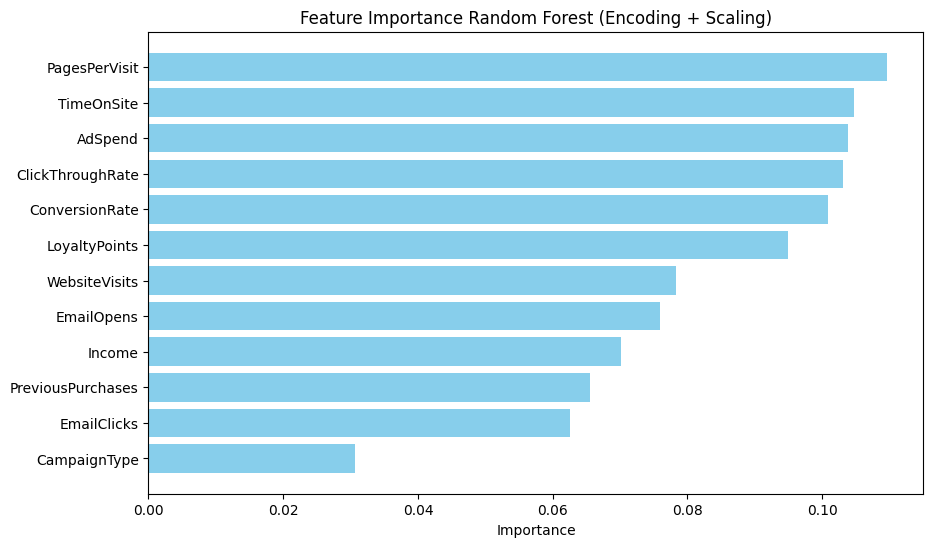

In [ ]:
importances = rf_model.feature_importances_
features = X_train_processed.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance Random Forest (Encoding + Scaling)')
plt.xlabel('Importance')
plt.show()

#### Manual

In [ ]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None, random_state=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None
        self.random_state = np.random.RandomState(random_state)

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = self.random_state.choice(n_feats, self.n_features, replace=False)

        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_features=None, random_state=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.random_state = np.random.RandomState(random_state)
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree_random_state = self.random_state.randint(0, 1_000_000)
            tree = DecisionTree(max_depth=self.max_depth,
                                min_samples_split=self.min_samples_split,
                                n_features=self.n_features,
                                random_state=tree_random_state)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = self.random_state.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [221]:
X_train_np = X_train_processed.to_numpy().astype(np.float64)
X_test_np = X_test_processed.to_numpy().astype(np.float64)
y_train_np = y_train.to_numpy().astype(int)
y_test_np = y_test.to_numpy().astype(int)

rf = RandomForest(
    n_trees=10,
    max_depth=10,
    min_samples_split=2,
    n_features=int(np.sqrt(X_train_np.shape[1])),  # typical RF feature count
    random_state=42  # reproducibility
)

rf.fit(X_train_np, y_train_np)
y_pred = rf.predict(X_test_np)

print("=== Random Forest Classification Report ===")
print(classification_report(y_test_np, y_pred, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test_np, y_pred))

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.17      0.28       198
           1       0.89      0.99      0.94      1402

    accuracy                           0.89      1600
   macro avg       0.83      0.58      0.61      1600
weighted avg       0.88      0.89      0.86      1600

Confusion Matrix:
[[  34  164]
 [  11 1391]]


In [222]:
X_test_original = df_original.loc[X_test.index, categorical_feat + numerical_feat]

print("\nSample Hasil Prediksi:")
print(y_pred)

results_df = X_test_original.copy()
results_df['True_Label'] = y_test.values
results_df['Predicted_Label'] = y_pred
results_df['Correct'] = results_df['True_Label'] == results_df['Predicted_Label']
results_df['Correct'] = results_df['Correct'].map({True: 'Benar', False: 'Salah'})

results_df.to_csv('RandomForest-PrediksiTest.csv', index=False)
print("Prediksi disimpan: 'RandomForest-PrediksiTest.csv'")


Sample Hasil Prediksi:
[1 1 1 ... 1 1 1]
Prediksi disimpan: 'RandomForest-PrediksiTest.csv'


In [223]:
import joblib

joblib.dump(rf, 'RandomForest_Manual.joblib')
print("Model Random Forest disimpan ke 'RandomForest_Manual.joblib'")

Model Random Forest disimpan ke 'RandomForest_Manual.joblib'


In [224]:
rf_loaded = joblib.load('RandomForest_Manual.joblib')

y_pred_train = rf_loaded.predict(X_train_np)
y_pred_test = rf_loaded.predict(X_test_np)

In [225]:
from sklearn.metrics import classification_report, confusion_matrix

# === EVALUASI TRAIN ===
print("\n=== Random Forest - TRAIN DATA ===")
print(classification_report(y_train_np, y_pred_train, zero_division=0))
print("Confusion Matrix (Train):")
print(confusion_matrix(y_train_np, y_pred_train))

# === EVALUASI TEST ===
print("\n=== Random Forest - TEST DATA ===")
print(classification_report(y_test_np, y_pred_test, zero_division=0))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test_np, y_pred_test))


=== Random Forest - TRAIN DATA ===
              precision    recall  f1-score   support

           0       1.00      0.59      0.74       790
           1       0.95      1.00      0.97      5610

    accuracy                           0.95      6400
   macro avg       0.97      0.79      0.86      6400
weighted avg       0.95      0.95      0.94      6400

Confusion Matrix (Train):
[[ 465  325]
 [   1 5609]]

=== Random Forest - TEST DATA ===
              precision    recall  f1-score   support

           0       0.76      0.17      0.28       198
           1       0.89      0.99      0.94      1402

    accuracy                           0.89      1600
   macro avg       0.83      0.58      0.61      1600
weighted avg       0.88      0.89      0.86      1600

Confusion Matrix (Test):
[[  34  164]
 [  11 1391]]


## Prediksi

In [ ]:
print("Descriptive statistics:")
print(X_test.describe().T[['min', '50%', 'max']])

Descriptive statistics:
                            min           50%            max
CampaignType           0.000000      1.000000       3.000000
Income             20029.000000  85628.000000  149986.000000
AdSpend              100.054813   4925.325854    9996.986533
ClickThroughRate       0.010395      0.156583       0.299762
ConversionRate         0.010163      0.108662       0.199840
WebsiteVisits          0.000000     24.000000      49.000000
PagesPerVisit          1.000428      5.730253       9.989912
TimeOnSite             0.502116      7.840621      14.995026
EmailOpens             0.000000     10.000000      19.000000
EmailClicks            0.000000      4.000000       9.000000
PreviousPurchases      0.000000      4.000000       9.000000
LoyaltyPoints          0.000000   2482.000000    4999.000000


In [231]:
import numpy as np
import pandas as pd
import joblib

model_params = joblib.load('LinearSVM_Manual.joblib')
w = model_params['w']
b = model_params['b']

preprocessor = joblib.load('preprocessor.pkl')
scaler = preprocessor['scaler']
encoders = preprocessor['encoders']
categorical_feat = preprocessor['categorical_feat']
numerical_feat = preprocessor['numerical_feat']

sample_raw = {
    "CampaignType": "Conversion",
    "Income": 30558,
    "AdSpend": 2076.535113910116,
    "ClickThroughRate": 0.0771545687008888,
    "ConversionRate": 0.0154771974827736,
    "WebsiteVisits": 9,
    "PagesPerVisit": 7.818844717795544,
    "TimeOnSite": 14.229981592378053,
    "EmailOpens": 11,
    "EmailClicks": 4,
    "PreviousPurchases": 2,
    "LoyaltyPoints": 951,    
}

df_sample = pd.DataFrame([sample_raw])

for col in categorical_feat:
    le = encoders[col]
    df_sample[col] = le.transform(df_sample[col])

X_cat = df_sample[categorical_feat]
X_num = df_sample[numerical_feat]

X_num_scaled = scaler.transform(X_num)

X_processed = pd.concat(
    [X_cat.reset_index(drop=True),
     pd.DataFrame(X_num_scaled, columns=numerical_feat)],
    axis=1
)

X_np = X_processed.to_numpy().astype(np.float64)

def svm_predict_manual(X, w, b):
    return np.where(np.dot(X, w) + b >= 0, 1, 0)

pred_label = svm_predict_manual(X_np, w, b)
print("Prediksi label SVM untuk input ini adalah:", pred_label[0])

Prediksi label SVM untuk input ini adalah: 0


In [232]:
import pandas as pd
import numpy as np
import joblib

rf_loaded = joblib.load('RandomForest_Manual.joblib')
preprocessor = joblib.load('preprocessor.pkl')

scaler = preprocessor['scaler']
encoders = preprocessor['encoders']
categorical_feat = preprocessor['categorical_feat']
numerical_feat = preprocessor['numerical_feat']

sample_raw = {
    "CampaignType": "Conversion",
    "Income": 30558,
    "AdSpend": 2076.535113910116,
    "ClickThroughRate": 0.0771545687008888,
    "ConversionRate": 0.0154771974827736,
    "WebsiteVisits": 9,
    "PagesPerVisit": 7.818844717795544,
    "TimeOnSite": 14.229981592378053,
    "EmailOpens": 11,
    "EmailClicks": 4,
    "PreviousPurchases": 2,
    "LoyaltyPoints": 951
}

df_sample = pd.DataFrame([sample_raw])

for col in categorical_feat:
    df_sample[col] = encoders[col].transform(df_sample[col])

X_cat = df_sample[categorical_feat]
X_num = df_sample[numerical_feat]

X_num_scaled = scaler.transform(X_num)

X_processed = pd.concat(
    [X_cat.reset_index(drop=True),
     pd.DataFrame(X_num_scaled, columns=numerical_feat)],
    axis=1
)

X_np = X_processed.to_numpy().astype(np.float64)
pred = rf_loaded.predict(X_np)

print("Prediksi untuk sample input:", pred[0])

Prediksi untuk sample input: 1
